# 1. Breast Cancer data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer()
breast_cancerDF = pd.DataFrame(breast_cancer.data)
breast_cancerDF[30] = breast_cancer.target
breast_cancerDF.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
df = breast_cancerDF.sample(frac=1)
dataset = df.values
X = np.array(dataset[:, 0:30], dtype = np.float64)
Y = dataset[:,30]

In [7]:
X

array([[2.321e+01, 2.697e+01, 1.535e+02, ..., 2.593e-01, 3.103e-01,
        8.677e-02],
       [1.164e+01, 1.833e+01, 7.517e+01, ..., 1.218e-01, 2.806e-01,
        9.097e-02],
       [1.289e+01, 1.570e+01, 8.408e+01, ..., 1.017e-01, 1.999e-01,
        7.127e-02],
       ...,
       [1.537e+01, 2.276e+01, 1.002e+02, ..., 1.476e-01, 2.556e-01,
        6.828e-02],
       [2.034e+01, 2.151e+01, 1.359e+02, ..., 2.685e-01, 5.558e-01,
        1.024e-01],
       [1.549e+01, 1.997e+01, 1.024e+02, ..., 2.121e-01, 3.187e-01,
        1.019e-01]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [9]:
# 모델 설정
model = Sequential([
    Dense(24, input_shape=(30,), activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                744       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,157
Trainable params: 1,157
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [12]:
modelpath = MODEL_DIR + "breast{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [13]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 8.60934, saving model to ./model/breast001-8.6093.hdf5

Epoch 00002: val_loss improved from 8.60934 to 7.43315, saving model to ./model/breast002-7.4332.hdf5

Epoch 00003: val_loss improved from 7.43315 to 6.30157, saving model to ./model/breast003-6.3016.hdf5

Epoch 00004: val_loss improved from 6.30157 to 5.21675, saving model to ./model/breast004-5.2168.hdf5

Epoch 00005: val_loss improved from 5.21675 to 4.16411, saving model to ./model/breast005-4.1641.hdf5

Epoch 00006: val_loss improved from 4.16411 to 3.15127, saving model to ./model/breast006-3.1513.hdf5

Epoch 00007: val_loss improved from 3.15127 to 2.20453, saving model to ./model/breast007-2.2045.hdf5

Epoch 00008: val_loss improved from 2.20453 to 1.48865, saving model to ./model/breast008-1.4887.hdf5

Epoch 00009: val_loss improved from 1.48865 to 1.11665, saving model to ./model/breast009-1.1166.hdf5

Epoch 00010: val_loss improved from 1.11665 to 1.03947, saving model to ./mo


Epoch 00090: val_loss improved from 0.53630 to 0.53369, saving model to ./model/breast090-0.5337.hdf5

Epoch 00091: val_loss improved from 0.53369 to 0.53121, saving model to ./model/breast091-0.5312.hdf5

Epoch 00092: val_loss improved from 0.53121 to 0.52885, saving model to ./model/breast092-0.5289.hdf5

Epoch 00093: val_loss improved from 0.52885 to 0.52657, saving model to ./model/breast093-0.5266.hdf5

Epoch 00094: val_loss improved from 0.52657 to 0.52434, saving model to ./model/breast094-0.5243.hdf5

Epoch 00095: val_loss improved from 0.52434 to 0.52212, saving model to ./model/breast095-0.5221.hdf5

Epoch 00096: val_loss improved from 0.52212 to 0.51987, saving model to ./model/breast096-0.5199.hdf5

Epoch 00097: val_loss improved from 0.51987 to 0.51757, saving model to ./model/breast097-0.5176.hdf5

Epoch 00098: val_loss improved from 0.51757 to 0.51519, saving model to ./model/breast098-0.5152.hdf5

Epoch 00099: val_loss improved from 0.51519 to 0.51274, saving model to 


Epoch 00178: val_loss improved from 0.31073 to 0.30799, saving model to ./model/breast178-0.3080.hdf5

Epoch 00179: val_loss improved from 0.30799 to 0.30541, saving model to ./model/breast179-0.3054.hdf5

Epoch 00180: val_loss improved from 0.30541 to 0.30297, saving model to ./model/breast180-0.3030.hdf5

Epoch 00181: val_loss improved from 0.30297 to 0.30055, saving model to ./model/breast181-0.3006.hdf5

Epoch 00182: val_loss improved from 0.30055 to 0.29796, saving model to ./model/breast182-0.2980.hdf5

Epoch 00183: val_loss improved from 0.29796 to 0.29525, saving model to ./model/breast183-0.2952.hdf5

Epoch 00184: val_loss improved from 0.29525 to 0.29259, saving model to ./model/breast184-0.2926.hdf5

Epoch 00185: val_loss improved from 0.29259 to 0.29009, saving model to ./model/breast185-0.2901.hdf5

Epoch 00186: val_loss improved from 0.29009 to 0.28790, saving model to ./model/breast186-0.2879.hdf5

Epoch 00187: val_loss improved from 0.28790 to 0.28602, saving model to 


Epoch 00258: val_loss improved from 0.24592 to 0.24565, saving model to ./model/breast258-0.2457.hdf5

Epoch 00259: val_loss improved from 0.24565 to 0.24541, saving model to ./model/breast259-0.2454.hdf5

Epoch 00260: val_loss improved from 0.24541 to 0.24517, saving model to ./model/breast260-0.2452.hdf5

Epoch 00261: val_loss improved from 0.24517 to 0.24495, saving model to ./model/breast261-0.2449.hdf5

Epoch 00262: val_loss improved from 0.24495 to 0.24473, saving model to ./model/breast262-0.2447.hdf5

Epoch 00263: val_loss improved from 0.24473 to 0.24451, saving model to ./model/breast263-0.2445.hdf5

Epoch 00264: val_loss improved from 0.24451 to 0.24429, saving model to ./model/breast264-0.2443.hdf5

Epoch 00265: val_loss improved from 0.24429 to 0.24405, saving model to ./model/breast265-0.2441.hdf5

Epoch 00266: val_loss improved from 0.24405 to 0.24381, saving model to ./model/breast266-0.2438.hdf5

Epoch 00267: val_loss improved from 0.24381 to 0.24356, saving model to 


Epoch 00350: val_loss improved from 0.23235 to 0.23228, saving model to ./model/breast350-0.2323.hdf5

Epoch 00351: val_loss improved from 0.23228 to 0.23220, saving model to ./model/breast351-0.2322.hdf5

Epoch 00352: val_loss improved from 0.23220 to 0.23212, saving model to ./model/breast352-0.2321.hdf5

Epoch 00353: val_loss improved from 0.23212 to 0.23204, saving model to ./model/breast353-0.2320.hdf5

Epoch 00354: val_loss improved from 0.23204 to 0.23195, saving model to ./model/breast354-0.2319.hdf5

Epoch 00355: val_loss improved from 0.23195 to 0.23186, saving model to ./model/breast355-0.2319.hdf5

Epoch 00356: val_loss improved from 0.23186 to 0.23178, saving model to ./model/breast356-0.2318.hdf5

Epoch 00357: val_loss improved from 0.23178 to 0.23171, saving model to ./model/breast357-0.2317.hdf5

Epoch 00358: val_loss improved from 0.23171 to 0.23164, saving model to ./model/breast358-0.2316.hdf5

Epoch 00359: val_loss improved from 0.23164 to 0.23157, saving model to 


Epoch 00434: val_loss improved from 0.22784 to 0.22783, saving model to ./model/breast434-0.2278.hdf5

Epoch 00435: val_loss improved from 0.22783 to 0.22783, saving model to ./model/breast435-0.2278.hdf5

Epoch 00436: val_loss improved from 0.22783 to 0.22782, saving model to ./model/breast436-0.2278.hdf5

Epoch 00437: val_loss improved from 0.22782 to 0.22780, saving model to ./model/breast437-0.2278.hdf5

Epoch 00438: val_loss improved from 0.22780 to 0.22778, saving model to ./model/breast438-0.2278.hdf5

Epoch 00439: val_loss improved from 0.22778 to 0.22774, saving model to ./model/breast439-0.2277.hdf5

Epoch 00440: val_loss improved from 0.22774 to 0.22770, saving model to ./model/breast440-0.2277.hdf5

Epoch 00441: val_loss improved from 0.22770 to 0.22765, saving model to ./model/breast441-0.2277.hdf5

Epoch 00442: val_loss improved from 0.22765 to 0.22760, saving model to ./model/breast442-0.2276.hdf5

Epoch 00443: val_loss improved from 0.22760 to 0.22754, saving model to 


Epoch 00524: val_loss improved from 0.22530 to 0.22528, saving model to ./model/breast524-0.2253.hdf5

Epoch 00525: val_loss improved from 0.22528 to 0.22525, saving model to ./model/breast525-0.2253.hdf5

Epoch 00526: val_loss improved from 0.22525 to 0.22524, saving model to ./model/breast526-0.2252.hdf5

Epoch 00527: val_loss improved from 0.22524 to 0.22522, saving model to ./model/breast527-0.2252.hdf5

Epoch 00528: val_loss improved from 0.22522 to 0.22520, saving model to ./model/breast528-0.2252.hdf5

Epoch 00529: val_loss improved from 0.22520 to 0.22518, saving model to ./model/breast529-0.2252.hdf5

Epoch 00530: val_loss improved from 0.22518 to 0.22516, saving model to ./model/breast530-0.2252.hdf5

Epoch 00531: val_loss improved from 0.22516 to 0.22514, saving model to ./model/breast531-0.2251.hdf5

Epoch 00532: val_loss improved from 0.22514 to 0.22510, saving model to ./model/breast532-0.2251.hdf5

Epoch 00533: val_loss improved from 0.22510 to 0.22507, saving model to 


Epoch 00615: val_loss improved from 0.22267 to 0.22264, saving model to ./model/breast615-0.2226.hdf5

Epoch 00616: val_loss improved from 0.22264 to 0.22261, saving model to ./model/breast616-0.2226.hdf5

Epoch 00617: val_loss improved from 0.22261 to 0.22258, saving model to ./model/breast617-0.2226.hdf5

Epoch 00618: val_loss improved from 0.22258 to 0.22254, saving model to ./model/breast618-0.2225.hdf5

Epoch 00619: val_loss improved from 0.22254 to 0.22251, saving model to ./model/breast619-0.2225.hdf5

Epoch 00620: val_loss improved from 0.22251 to 0.22248, saving model to ./model/breast620-0.2225.hdf5

Epoch 00621: val_loss improved from 0.22248 to 0.22245, saving model to ./model/breast621-0.2224.hdf5

Epoch 00622: val_loss improved from 0.22245 to 0.22242, saving model to ./model/breast622-0.2224.hdf5

Epoch 00623: val_loss improved from 0.22242 to 0.22239, saving model to ./model/breast623-0.2224.hdf5

Epoch 00624: val_loss improved from 0.22239 to 0.22236, saving model to 


Epoch 00708: val_loss improved from 0.21971 to 0.21970, saving model to ./model/breast708-0.2197.hdf5

Epoch 00709: val_loss improved from 0.21970 to 0.21969, saving model to ./model/breast709-0.2197.hdf5

Epoch 00710: val_loss improved from 0.21969 to 0.21967, saving model to ./model/breast710-0.2197.hdf5

Epoch 00711: val_loss improved from 0.21967 to 0.21961, saving model to ./model/breast711-0.2196.hdf5

Epoch 00712: val_loss improved from 0.21961 to 0.21952, saving model to ./model/breast712-0.2195.hdf5

Epoch 00713: val_loss improved from 0.21952 to 0.21942, saving model to ./model/breast713-0.2194.hdf5

Epoch 00714: val_loss improved from 0.21942 to 0.21933, saving model to ./model/breast714-0.2193.hdf5

Epoch 00715: val_loss improved from 0.21933 to 0.21927, saving model to ./model/breast715-0.2193.hdf5

Epoch 00716: val_loss improved from 0.21927 to 0.21923, saving model to ./model/breast716-0.2192.hdf5

Epoch 00717: val_loss improved from 0.21923 to 0.21920, saving model to 


Epoch 00799: val_loss improved from 0.21610 to 0.21607, saving model to ./model/breast799-0.2161.hdf5

Epoch 00800: val_loss improved from 0.21607 to 0.21602, saving model to ./model/breast800-0.2160.hdf5

Epoch 00801: val_loss improved from 0.21602 to 0.21594, saving model to ./model/breast801-0.2159.hdf5

Epoch 00802: val_loss improved from 0.21594 to 0.21587, saving model to ./model/breast802-0.2159.hdf5

Epoch 00803: val_loss improved from 0.21587 to 0.21583, saving model to ./model/breast803-0.2158.hdf5

Epoch 00804: val_loss improved from 0.21583 to 0.21582, saving model to ./model/breast804-0.2158.hdf5

Epoch 00805: val_loss did not improve from 0.21582

Epoch 00806: val_loss did not improve from 0.21582

Epoch 00807: val_loss improved from 0.21582 to 0.21581, saving model to ./model/breast807-0.2158.hdf5

Epoch 00808: val_loss improved from 0.21581 to 0.21574, saving model to ./model/breast808-0.2157.hdf5

Epoch 00809: val_loss improved from 0.21574 to 0.21564, saving model to


Epoch 00896: val_loss improved from 0.21188 to 0.21179, saving model to ./model/breast896-0.2118.hdf5

Epoch 00897: val_loss improved from 0.21179 to 0.21172, saving model to ./model/breast897-0.2117.hdf5

Epoch 00898: val_loss improved from 0.21172 to 0.21166, saving model to ./model/breast898-0.2117.hdf5

Epoch 00899: val_loss improved from 0.21166 to 0.21165, saving model to ./model/breast899-0.2116.hdf5

Epoch 00900: val_loss improved from 0.21165 to 0.21164, saving model to ./model/breast900-0.2116.hdf5

Epoch 00901: val_loss improved from 0.21164 to 0.21162, saving model to ./model/breast901-0.2116.hdf5

Epoch 00902: val_loss improved from 0.21162 to 0.21161, saving model to ./model/breast902-0.2116.hdf5

Epoch 00903: val_loss improved from 0.21161 to 0.21158, saving model to ./model/breast903-0.2116.hdf5

Epoch 00904: val_loss improved from 0.21158 to 0.21152, saving model to ./model/breast904-0.2115.hdf5

Epoch 00905: val_loss improved from 0.21152 to 0.21143, saving model to 


Epoch 00982: val_loss improved from 0.20761 to 0.20759, saving model to ./model/breast982-0.2076.hdf5

Epoch 00983: val_loss improved from 0.20759 to 0.20757, saving model to ./model/breast983-0.2076.hdf5

Epoch 00984: val_loss improved from 0.20757 to 0.20751, saving model to ./model/breast984-0.2075.hdf5

Epoch 00985: val_loss improved from 0.20751 to 0.20741, saving model to ./model/breast985-0.2074.hdf5

Epoch 00986: val_loss improved from 0.20741 to 0.20730, saving model to ./model/breast986-0.2073.hdf5

Epoch 00987: val_loss improved from 0.20730 to 0.20718, saving model to ./model/breast987-0.2072.hdf5

Epoch 00988: val_loss improved from 0.20718 to 0.20710, saving model to ./model/breast988-0.2071.hdf5

Epoch 00989: val_loss improved from 0.20710 to 0.20706, saving model to ./model/breast989-0.2071.hdf5

Epoch 00990: val_loss did not improve from 0.20706

Epoch 00991: val_loss did not improve from 0.20706

Epoch 00992: val_loss did not improve from 0.20706

Epoch 00993: val_lo


Epoch 01068: val_loss improved from 0.20289 to 0.20288, saving model to ./model/breast1068-0.2029.hdf5

Epoch 01069: val_loss improved from 0.20288 to 0.20285, saving model to ./model/breast1069-0.2028.hdf5

Epoch 01070: val_loss improved from 0.20285 to 0.20279, saving model to ./model/breast1070-0.2028.hdf5

Epoch 01071: val_loss improved from 0.20279 to 0.20270, saving model to ./model/breast1071-0.2027.hdf5

Epoch 01072: val_loss improved from 0.20270 to 0.20261, saving model to ./model/breast1072-0.2026.hdf5

Epoch 01073: val_loss improved from 0.20261 to 0.20252, saving model to ./model/breast1073-0.2025.hdf5

Epoch 01074: val_loss improved from 0.20252 to 0.20246, saving model to ./model/breast1074-0.2025.hdf5

Epoch 01075: val_loss improved from 0.20246 to 0.20242, saving model to ./model/breast1075-0.2024.hdf5

Epoch 01076: val_loss improved from 0.20242 to 0.20239, saving model to ./model/breast1076-0.2024.hdf5

Epoch 01077: val_loss improved from 0.20239 to 0.20235, saving 

Epoch 01157: val_loss improved from 0.19812 to 0.19807, saving model to ./model/breast1157-0.1981.hdf5

Epoch 01158: val_loss improved from 0.19807 to 0.19801, saving model to ./model/breast1158-0.1980.hdf5

Epoch 01159: val_loss improved from 0.19801 to 0.19795, saving model to ./model/breast1159-0.1980.hdf5

Epoch 01160: val_loss improved from 0.19795 to 0.19790, saving model to ./model/breast1160-0.1979.hdf5

Epoch 01161: val_loss improved from 0.19790 to 0.19784, saving model to ./model/breast1161-0.1978.hdf5

Epoch 01162: val_loss improved from 0.19784 to 0.19779, saving model to ./model/breast1162-0.1978.hdf5

Epoch 01163: val_loss improved from 0.19779 to 0.19774, saving model to ./model/breast1163-0.1977.hdf5

Epoch 01164: val_loss improved from 0.19774 to 0.19768, saving model to ./model/breast1164-0.1977.hdf5

Epoch 01165: val_loss improved from 0.19768 to 0.19763, saving model to ./model/breast1165-0.1976.hdf5

Epoch 01166: val_loss improved from 0.19763 to 0.19762, saving m


Epoch 01259: val_loss did not improve from 0.19210

Epoch 01260: val_loss did not improve from 0.19210

Epoch 01261: val_loss improved from 0.19210 to 0.19208, saving model to ./model/breast1261-0.1921.hdf5

Epoch 01262: val_loss improved from 0.19208 to 0.19190, saving model to ./model/breast1262-0.1919.hdf5

Epoch 01263: val_loss improved from 0.19190 to 0.19180, saving model to ./model/breast1263-0.1918.hdf5

Epoch 01264: val_loss did not improve from 0.19180

Epoch 01265: val_loss did not improve from 0.19180

Epoch 01266: val_loss did not improve from 0.19180

Epoch 01267: val_loss did not improve from 0.19180

Epoch 01268: val_loss improved from 0.19180 to 0.19161, saving model to ./model/breast1268-0.1916.hdf5

Epoch 01269: val_loss improved from 0.19161 to 0.19139, saving model to ./model/breast1269-0.1914.hdf5

Epoch 01270: val_loss improved from 0.19139 to 0.19134, saving model to ./model/breast1270-0.1913.hdf5

Epoch 01271: val_loss did not improve from 0.19134

Epoch 01272


Epoch 01400: val_loss improved from 0.18848 to 0.18825, saving model to ./model/breast1400-0.1882.hdf5

Epoch 01401: val_loss improved from 0.18825 to 0.18811, saving model to ./model/breast1401-0.1881.hdf5

Epoch 01402: val_loss did not improve from 0.18811

Epoch 01403: val_loss did not improve from 0.18811

Epoch 01404: val_loss did not improve from 0.18811

Epoch 01405: val_loss did not improve from 0.18811

Epoch 01406: val_loss did not improve from 0.18811

Epoch 01407: val_loss improved from 0.18811 to 0.18803, saving model to ./model/breast1407-0.1880.hdf5

Epoch 01408: val_loss improved from 0.18803 to 0.18798, saving model to ./model/breast1408-0.1880.hdf5

Epoch 01409: val_loss did not improve from 0.18798

Epoch 01410: val_loss did not improve from 0.18798

Epoch 01411: val_loss did not improve from 0.18798

Epoch 01412: val_loss improved from 0.18798 to 0.18790, saving model to ./model/breast1412-0.1879.hdf5

Epoch 01413: val_loss improved from 0.18790 to 0.18776, saving 


Epoch 01511: val_loss improved from 0.18225 to 0.18210, saving model to ./model/breast1511-0.1821.hdf5

Epoch 01512: val_loss improved from 0.18210 to 0.18197, saving model to ./model/breast1512-0.1820.hdf5

Epoch 01513: val_loss did not improve from 0.18197

Epoch 01514: val_loss did not improve from 0.18197

Epoch 01515: val_loss did not improve from 0.18197

Epoch 01516: val_loss improved from 0.18197 to 0.18190, saving model to ./model/breast1516-0.1819.hdf5

Epoch 01517: val_loss improved from 0.18190 to 0.18176, saving model to ./model/breast1517-0.1818.hdf5

Epoch 01518: val_loss did not improve from 0.18176

Epoch 01519: val_loss did not improve from 0.18176

Epoch 01520: val_loss improved from 0.18176 to 0.18171, saving model to ./model/breast1520-0.1817.hdf5

Epoch 01521: val_loss improved from 0.18171 to 0.18159, saving model to ./model/breast1521-0.1816.hdf5

Epoch 01522: val_loss improved from 0.18159 to 0.18152, saving model to ./model/breast1522-0.1815.hdf5

Epoch 01523


Epoch 01621: val_loss did not improve from 0.17578

Epoch 01622: val_loss improved from 0.17578 to 0.17571, saving model to ./model/breast1622-0.1757.hdf5

Epoch 01623: val_loss improved from 0.17571 to 0.17557, saving model to ./model/breast1623-0.1756.hdf5

Epoch 01624: val_loss did not improve from 0.17557

Epoch 01625: val_loss did not improve from 0.17557

Epoch 01626: val_loss did not improve from 0.17557

Epoch 01627: val_loss improved from 0.17557 to 0.17532, saving model to ./model/breast1627-0.1753.hdf5

Epoch 01628: val_loss improved from 0.17532 to 0.17512, saving model to ./model/breast1628-0.1751.hdf5

Epoch 01629: val_loss did not improve from 0.17512

Epoch 01630: val_loss did not improve from 0.17512

Epoch 01631: val_loss did not improve from 0.17512

Epoch 01632: val_loss did not improve from 0.17512

Epoch 01633: val_loss improved from 0.17512 to 0.17511, saving model to ./model/breast1633-0.1751.hdf5

Epoch 01634: val_loss improved from 0.17511 to 0.17491, saving 


Epoch 01735: val_loss did not improve from 0.16814

Epoch 01736: val_loss did not improve from 0.16814

Epoch 01737: val_loss improved from 0.16814 to 0.16804, saving model to ./model/breast1737-0.1680.hdf5

Epoch 01738: val_loss did not improve from 0.16804

Epoch 01739: val_loss did not improve from 0.16804

Epoch 01740: val_loss improved from 0.16804 to 0.16784, saving model to ./model/breast1740-0.1678.hdf5

Epoch 01741: val_loss improved from 0.16784 to 0.16748, saving model to ./model/breast1741-0.1675.hdf5

Epoch 01742: val_loss improved from 0.16748 to 0.16737, saving model to ./model/breast1742-0.1674.hdf5

Epoch 01743: val_loss did not improve from 0.16737

Epoch 01744: val_loss did not improve from 0.16737

Epoch 01745: val_loss did not improve from 0.16737

Epoch 01746: val_loss improved from 0.16737 to 0.16735, saving model to ./model/breast1746-0.1673.hdf5

Epoch 01747: val_loss improved from 0.16735 to 0.16693, saving model to ./model/breast1747-0.1669.hdf5

Epoch 01748


Epoch 01860: val_loss did not improve from 0.15784

Epoch 01861: val_loss did not improve from 0.15784

Epoch 01862: val_loss improved from 0.15784 to 0.15749, saving model to ./model/breast1862-0.1575.hdf5

Epoch 01863: val_loss improved from 0.15749 to 0.15747, saving model to ./model/breast1863-0.1575.hdf5

Epoch 01864: val_loss did not improve from 0.15747

Epoch 01865: val_loss did not improve from 0.15747

Epoch 01866: val_loss improved from 0.15747 to 0.15710, saving model to ./model/breast1866-0.1571.hdf5

Epoch 01867: val_loss did not improve from 0.15710

Epoch 01868: val_loss did not improve from 0.15710

Epoch 01869: val_loss did not improve from 0.15710

Epoch 01870: val_loss improved from 0.15710 to 0.15672, saving model to ./model/breast1870-0.1567.hdf5

Epoch 01871: val_loss did not improve from 0.15672

Epoch 01872: val_loss did not improve from 0.15672

Epoch 01873: val_loss did not improve from 0.15672

Epoch 01874: val_loss improved from 0.15672 to 0.15659, saving 


Epoch 01967: val_loss did not improve from 0.14741

Epoch 01968: val_loss did not improve from 0.14741

Epoch 01969: val_loss improved from 0.14741 to 0.14733, saving model to ./model/breast1969-0.1473.hdf5

Epoch 01970: val_loss improved from 0.14733 to 0.14724, saving model to ./model/breast1970-0.1472.hdf5

Epoch 01971: val_loss did not improve from 0.14724

Epoch 01972: val_loss did not improve from 0.14724

Epoch 01973: val_loss did not improve from 0.14724

Epoch 01974: val_loss improved from 0.14724 to 0.14674, saving model to ./model/breast1974-0.1467.hdf5

Epoch 01975: val_loss improved from 0.14674 to 0.14667, saving model to ./model/breast1975-0.1467.hdf5

Epoch 01976: val_loss did not improve from 0.14667

Epoch 01977: val_loss did not improve from 0.14667

Epoch 01978: val_loss did not improve from 0.14667

Epoch 01979: val_loss improved from 0.14667 to 0.14667, saving model to ./model/breast1979-0.1467.hdf5

Epoch 01980: val_loss improved from 0.14667 to 0.14649, saving 


Epoch 02078: val_loss improved from 0.13632 to 0.13632, saving model to ./model/breast2078-0.1363.hdf5

Epoch 02079: val_loss improved from 0.13632 to 0.13619, saving model to ./model/breast2079-0.1362.hdf5

Epoch 02080: val_loss improved from 0.13619 to 0.13599, saving model to ./model/breast2080-0.1360.hdf5

Epoch 02081: val_loss improved from 0.13599 to 0.13589, saving model to ./model/breast2081-0.1359.hdf5

Epoch 02082: val_loss improved from 0.13589 to 0.13586, saving model to ./model/breast2082-0.1359.hdf5

Epoch 02083: val_loss improved from 0.13586 to 0.13575, saving model to ./model/breast2083-0.1357.hdf5

Epoch 02084: val_loss improved from 0.13575 to 0.13557, saving model to ./model/breast2084-0.1356.hdf5

Epoch 02085: val_loss improved from 0.13557 to 0.13546, saving model to ./model/breast2085-0.1355.hdf5

Epoch 02086: val_loss improved from 0.13546 to 0.13523, saving model to ./model/breast2086-0.1352.hdf5

Epoch 02087: val_loss did not improve from 0.13523

Epoch 02088


Epoch 02193: val_loss did not improve from 0.12533

Epoch 02194: val_loss improved from 0.12533 to 0.12520, saving model to ./model/breast2194-0.1252.hdf5

Epoch 02195: val_loss did not improve from 0.12520

Epoch 02196: val_loss did not improve from 0.12520

Epoch 02197: val_loss improved from 0.12520 to 0.12462, saving model to ./model/breast2197-0.1246.hdf5

Epoch 02198: val_loss did not improve from 0.12462

Epoch 02199: val_loss did not improve from 0.12462

Epoch 02200: val_loss did not improve from 0.12462

Epoch 02201: val_loss improved from 0.12462 to 0.12446, saving model to ./model/breast2201-0.1245.hdf5

Epoch 02202: val_loss did not improve from 0.12446

Epoch 02203: val_loss did not improve from 0.12446

Epoch 02204: val_loss improved from 0.12446 to 0.12390, saving model to ./model/breast2204-0.1239.hdf5

Epoch 02205: val_loss did not improve from 0.12390

Epoch 02206: val_loss did not improve from 0.12390

Epoch 02207: val_loss did not improve from 0.12390

Epoch 02208


Epoch 02319: val_loss improved from 0.11604 to 0.11590, saving model to ./model/breast2319-0.1159.hdf5

Epoch 02320: val_loss improved from 0.11590 to 0.11584, saving model to ./model/breast2320-0.1158.hdf5

Epoch 02321: val_loss improved from 0.11584 to 0.11583, saving model to ./model/breast2321-0.1158.hdf5

Epoch 02322: val_loss improved from 0.11583 to 0.11571, saving model to ./model/breast2322-0.1157.hdf5

Epoch 02323: val_loss improved from 0.11571 to 0.11566, saving model to ./model/breast2323-0.1157.hdf5

Epoch 02324: val_loss improved from 0.11566 to 0.11566, saving model to ./model/breast2324-0.1157.hdf5

Epoch 02325: val_loss improved from 0.11566 to 0.11556, saving model to ./model/breast2325-0.1156.hdf5

Epoch 02326: val_loss improved from 0.11556 to 0.11551, saving model to ./model/breast2326-0.1155.hdf5

Epoch 02327: val_loss improved from 0.11551 to 0.11550, saving model to ./model/breast2327-0.1155.hdf5

Epoch 02328: val_loss improved from 0.11550 to 0.11541, saving 


Epoch 02410: val_loss improved from 0.11098 to 0.11093, saving model to ./model/breast2410-0.1109.hdf5

Epoch 02411: val_loss improved from 0.11093 to 0.11089, saving model to ./model/breast2411-0.1109.hdf5

Epoch 02412: val_loss improved from 0.11089 to 0.11084, saving model to ./model/breast2412-0.1108.hdf5

Epoch 02413: val_loss improved from 0.11084 to 0.11080, saving model to ./model/breast2413-0.1108.hdf5

Epoch 02414: val_loss improved from 0.11080 to 0.11076, saving model to ./model/breast2414-0.1108.hdf5

Epoch 02415: val_loss improved from 0.11076 to 0.11072, saving model to ./model/breast2415-0.1107.hdf5

Epoch 02416: val_loss improved from 0.11072 to 0.11067, saving model to ./model/breast2416-0.1107.hdf5

Epoch 02417: val_loss improved from 0.11067 to 0.11063, saving model to ./model/breast2417-0.1106.hdf5

Epoch 02418: val_loss improved from 0.11063 to 0.11059, saving model to ./model/breast2418-0.1106.hdf5

Epoch 02419: val_loss improved from 0.11059 to 0.11055, saving 


Epoch 02504: val_loss improved from 0.10707 to 0.10706, saving model to ./model/breast2504-0.1071.hdf5

Epoch 02505: val_loss did not improve from 0.10706

Epoch 02506: val_loss improved from 0.10706 to 0.10698, saving model to ./model/breast2506-0.1070.hdf5

Epoch 02507: val_loss did not improve from 0.10698

Epoch 02508: val_loss improved from 0.10698 to 0.10691, saving model to ./model/breast2508-0.1069.hdf5

Epoch 02509: val_loss did not improve from 0.10691

Epoch 02510: val_loss improved from 0.10691 to 0.10686, saving model to ./model/breast2510-0.1069.hdf5

Epoch 02511: val_loss did not improve from 0.10686

Epoch 02512: val_loss improved from 0.10686 to 0.10681, saving model to ./model/breast2512-0.1068.hdf5

Epoch 02513: val_loss improved from 0.10681 to 0.10678, saving model to ./model/breast2513-0.1068.hdf5

Epoch 02514: val_loss improved from 0.10678 to 0.10675, saving model to ./model/breast2514-0.1067.hdf5

Epoch 02515: val_loss improved from 0.10675 to 0.10667, saving 


Epoch 02637: val_loss did not improve from 0.10115

Epoch 02638: val_loss did not improve from 0.10115

Epoch 02639: val_loss did not improve from 0.10115

Epoch 02640: val_loss did not improve from 0.10115

Epoch 02641: val_loss did not improve from 0.10115

Epoch 02642: val_loss did not improve from 0.10115

Epoch 02643: val_loss did not improve from 0.10115

Epoch 02644: val_loss did not improve from 0.10115

Epoch 02645: val_loss did not improve from 0.10115

Epoch 02646: val_loss did not improve from 0.10115

Epoch 02647: val_loss did not improve from 0.10115

Epoch 02648: val_loss did not improve from 0.10115

Epoch 02649: val_loss did not improve from 0.10115

Epoch 02650: val_loss did not improve from 0.10115

Epoch 02651: val_loss did not improve from 0.10115

Epoch 02652: val_loss did not improve from 0.10115

Epoch 02653: val_loss did not improve from 0.10115

Epoch 02654: val_loss did not improve from 0.10115

Epoch 02655: val_loss did not improve from 0.10115

Epoch 02656

In [15]:
del model
model = load_model('model/breast1829-0.0695.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

569/569 - 0s - loss: 0.0854 - accuracy: 0.9596

 Accuracy: 0.9596


In [16]:
y_breast_vloss=history.history['val_loss']

In [17]:
y_breast_acc=history.history['accuracy']

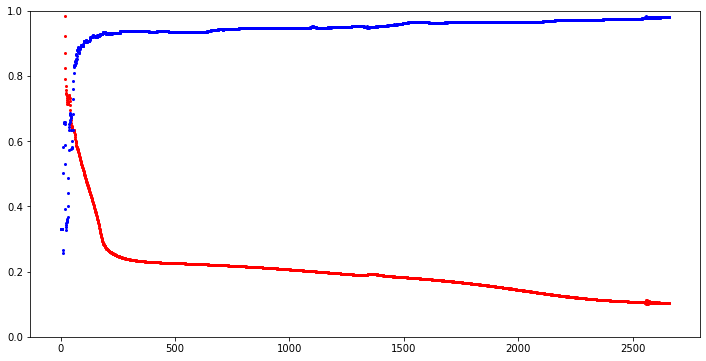

In [18]:
x_len = np.arange(len(y_breast_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_breast_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_breast_acc, "o", c="blue", markersize=2)

plt.show()

# 2. digits data

In [19]:
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()
digitsDF = pd.DataFrame(digits.data)
digitsDF[64] = digits.target
digitsDF.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [21]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [22]:
df = digitsDF.sample(frac=1)
dataset = df.values
X = dataset[:, 0:64].astype(float)
Y_obj = dataset[:,64]

In [23]:
Y_obj[0:10]

array([2., 2., 3., 3., 6., 1., 7., 0., 9., 0.])

In [24]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [25]:
Y

array([2, 2, 3, ..., 0, 4, 1], dtype=int64)

In [26]:
# One hot Encoding
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
Y_encoded.shape

(1797, 10)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=seed)

In [29]:
seed = 2020
tf.random.set_seed(seed)

In [30]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(24, input_shape=(64,), activation='relu'),
    Dense(18, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 18)                450       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                190       
Total params: 2,200
Trainable params: 2,200
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [32]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [33]:
modelpath = MODEL_DIR + "digit{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [34]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [35]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 8.42385, saving model to ./model/digit001-8.4239.hdf5

Epoch 00002: val_loss improved from 8.42385 to 7.07155, saving model to ./model/digit002-7.0716.hdf5

Epoch 00003: val_loss improved from 7.07155 to 5.99076, saving model to ./model/digit003-5.9908.hdf5

Epoch 00004: val_loss improved from 5.99076 to 5.13227, saving model to ./model/digit004-5.1323.hdf5

Epoch 00005: val_loss improved from 5.13227 to 4.43164, saving model to ./model/digit005-4.4316.hdf5

Epoch 00006: val_loss improved from 4.43164 to 3.84733, saving model to ./model/digit006-3.8473.hdf5

Epoch 00007: val_loss improved from 3.84733 to 3.37187, saving model to ./model/digit007-3.3719.hdf5

Epoch 00008: val_loss improved from 3.37187 to 3.00095, saving model to ./model/digit008-3.0009.hdf5

Epoch 00009: val_loss improved from 3.00095 to 2.70447, saving model to ./model/digit009-2.7045.hdf5

Epoch 00010: val_loss improved from 2.70447 to 2.46361, saving model to ./model/digit


Epoch 00084: val_loss improved from 0.42708 to 0.42107, saving model to ./model/digit084-0.4211.hdf5

Epoch 00085: val_loss improved from 0.42107 to 0.41591, saving model to ./model/digit085-0.4159.hdf5

Epoch 00086: val_loss improved from 0.41591 to 0.41086, saving model to ./model/digit086-0.4109.hdf5

Epoch 00087: val_loss improved from 0.41086 to 0.40477, saving model to ./model/digit087-0.4048.hdf5

Epoch 00088: val_loss improved from 0.40477 to 0.40108, saving model to ./model/digit088-0.4011.hdf5

Epoch 00089: val_loss improved from 0.40108 to 0.39740, saving model to ./model/digit089-0.3974.hdf5

Epoch 00090: val_loss improved from 0.39740 to 0.39135, saving model to ./model/digit090-0.3913.hdf5

Epoch 00091: val_loss improved from 0.39135 to 0.38534, saving model to ./model/digit091-0.3853.hdf5

Epoch 00092: val_loss improved from 0.38534 to 0.38158, saving model to ./model/digit092-0.3816.hdf5

Epoch 00093: val_loss improved from 0.38158 to 0.37870, saving model to ./model/d


Epoch 00169: val_loss improved from 0.24962 to 0.24883, saving model to ./model/digit169-0.2488.hdf5

Epoch 00170: val_loss improved from 0.24883 to 0.24788, saving model to ./model/digit170-0.2479.hdf5

Epoch 00171: val_loss improved from 0.24788 to 0.24623, saving model to ./model/digit171-0.2462.hdf5

Epoch 00172: val_loss improved from 0.24623 to 0.24524, saving model to ./model/digit172-0.2452.hdf5

Epoch 00173: val_loss improved from 0.24524 to 0.24473, saving model to ./model/digit173-0.2447.hdf5

Epoch 00174: val_loss improved from 0.24473 to 0.24464, saving model to ./model/digit174-0.2446.hdf5

Epoch 00175: val_loss did not improve from 0.24464

Epoch 00176: val_loss did not improve from 0.24464

Epoch 00177: val_loss did not improve from 0.24464

Epoch 00178: val_loss improved from 0.24464 to 0.24309, saving model to ./model/digit178-0.2431.hdf5

Epoch 00179: val_loss improved from 0.24309 to 0.24123, saving model to ./model/digit179-0.2412.hdf5

Epoch 00180: val_loss impro


Epoch 00270: val_loss improved from 0.21330 to 0.21321, saving model to ./model/digit270-0.2132.hdf5

Epoch 00271: val_loss did not improve from 0.21321

Epoch 00272: val_loss did not improve from 0.21321

Epoch 00273: val_loss did not improve from 0.21321

Epoch 00274: val_loss did not improve from 0.21321

Epoch 00275: val_loss did not improve from 0.21321

Epoch 00276: val_loss did not improve from 0.21321

Epoch 00277: val_loss did not improve from 0.21321

Epoch 00278: val_loss did not improve from 0.21321

Epoch 00279: val_loss did not improve from 0.21321

Epoch 00280: val_loss improved from 0.21321 to 0.21313, saving model to ./model/digit280-0.2131.hdf5

Epoch 00281: val_loss did not improve from 0.21313

Epoch 00282: val_loss did not improve from 0.21313

Epoch 00283: val_loss did not improve from 0.21313

Epoch 00284: val_loss did not improve from 0.21313

Epoch 00285: val_loss did not improve from 0.21313

Epoch 00286: val_loss did not improve from 0.21313

Epoch 00287: va

In [36]:
del model
model = load_model('model/digit776-0.1890.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.0876 - accuracy: 0.9806

 Accuracy: 0.9806


In [37]:
y_digit_vloss=history.history['val_loss']

In [38]:
y_digit_acc=history.history['accuracy']

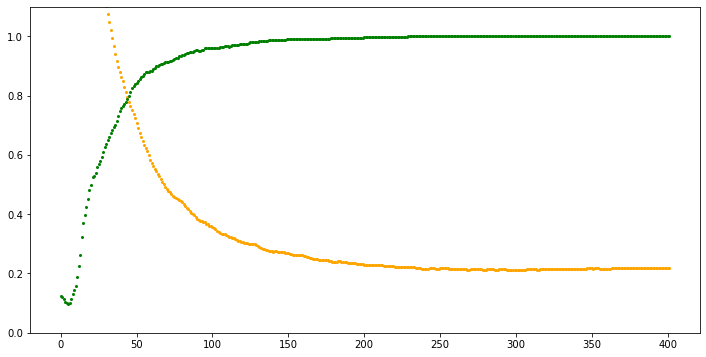

In [41]:
x_len = np.arange(len(y_digit_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1.1)
plt.plot(x_len, y_digit_vloss, "o", c="orange", markersize=2)
plt.plot(x_len, y_digit_acc, "o", c="green", markersize=2)

plt.show()